In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
df=pd.read_excel("7MarketHotelLandAnalysis.xlsx")
df

,Market Name,City,For Sale Price,Land Area to AC,Land Area to sqft,Land Sale to sqft,RevPAR
0,Inland Empire,Murrieta,468900,1.000000,43560.00000,10.764463,112.91
1,Inland Empire,Indio,499000,0.670000,29185.20000,17.097707,112.91
2,Inland Empire,Temecula,950000,0.870000,37897.20000,25.067815,112.91
3,Inland Empire,Barstow,300000,0.770000,33541.20000,8.944224,112.91
4,Inland Empire,Moreno Valley,1225000,0.990000,43124.40000,28.406192,112.91
5,San Diego,San Diego,12600000,0.965611,42062.01516,299.557688,137.61
6,Santa Clara,San Jose,7000000,0.387397,16875.01332,414.814487,112.98
7,San Francisco,San Francisco,0,0.490083,21348.01548,500.000000,158.22
8,Orange County,Dana Point,4995000,0.290000,12632.40000,395.411798,131.64
9,Orange County,Anaheim,2990000,0.500000,21780.00000,137.281910,131.64


In [58]:
mean_land_prices = df.groupby("Market Name")["Land Sale to sqft"].mean().sort_values(ascending=False).reset_index()

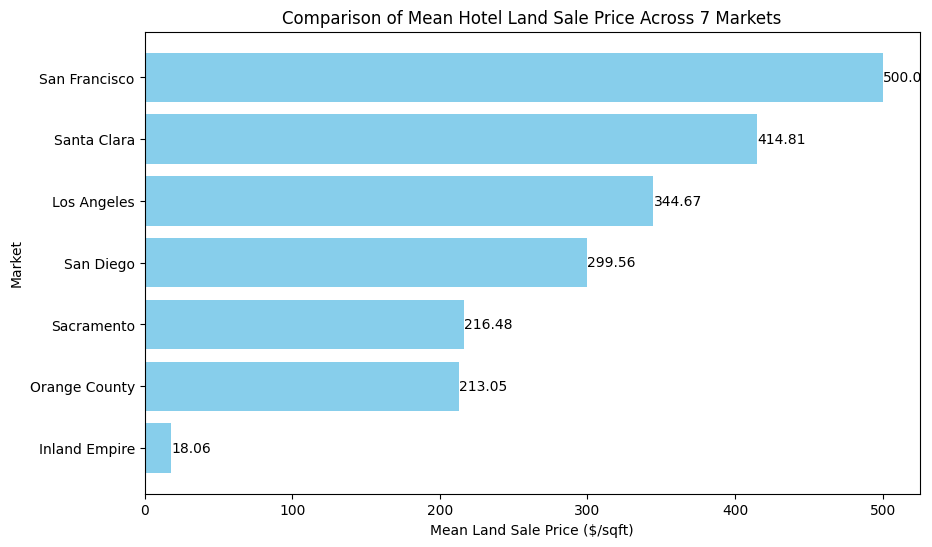

In [59]:
plt.figure(figsize=(10, 6))
bars = plt.barh(mean_land_prices["Market Name"], mean_land_prices["Land Sale to sqft"], color='skyblue')

for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 0.1, bar.get_y() + bar.get_height() / 2, round(xval, 2), ha='left', va='center')

plt.ylabel('Market')
plt.xlabel('Mean Land Sale Price ($/sqft)')
plt.title('Comparison of Mean Hotel Land Sale Price Across 7 Markets')

plt.gca().invert_yaxis()
plt.show()

In [60]:
mean_land_prices = df.groupby("Market Name")["Land Sale to sqft"].mean().sort_values(ascending=False).reset_index()
mean_revpar = df.groupby("Market Name")["RevPAR"].mean().reset_index()

In [61]:
mean_values = pd.merge(mean_land_prices, mean_revpar, on="Market Name")

In [62]:
markets = mean_values["Market Name"]
land_cost = mean_values["Land Sale to sqft"]
revpar = mean_values["RevPAR"]

In [63]:
colors = {
    "Inland Empire": "blue",
    "San Diego": "green",
    "Santa Clara": "red",
    "San Francisco": "purple",
    "Orange County": "orange",
    "Sacramento": "cyan",
    "Los Angeles": "magenta"
}
scatter_colors = [colors[market] for market in markets]

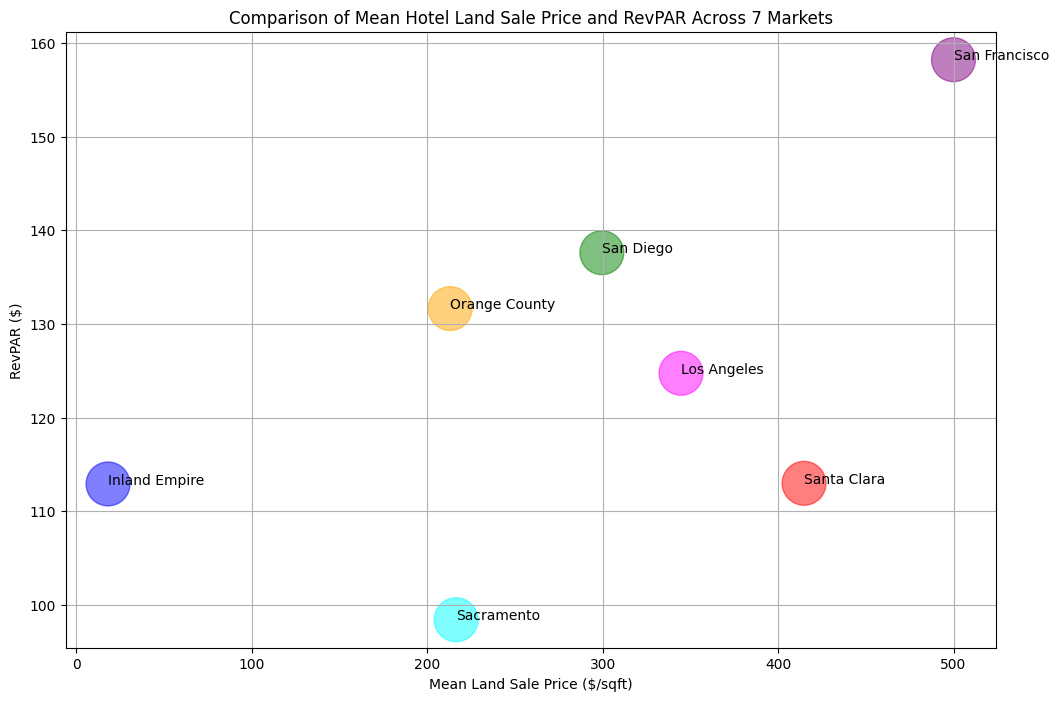

In [64]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(land_cost, revpar, alpha=0.5, c=scatter_colors, s=1000)

plt.xlabel('Mean Land Sale Price ($/sqft)')
plt.ylabel('RevPAR ($)')
plt.title('Comparison of Mean Hotel Land Sale Price and RevPAR Across 7 Markets')
plt.grid(True)

for i, market in enumerate(markets):
    plt.annotate(market, (land_cost[i], revpar[i]))

plt.show()

In [65]:
df1=pd.read_excel("7MarketApartmentLandAnalysis.xlsx")
df1

,Market Name,City,For Sale Price,Land Area to AC,Land Area to sqft,Land Sale to sqft,RevPAU
0,Inland Empire,Redlands,1670000,0.350000,15246.00000,109.536928,57.50
1,Inland Empire,Ontario,990000,0.689991,30056.00796,32.938506,57.50
2,Inland Empire,Big Bear Lake,499900,0.998623,43500.01788,11.491949,57.50
3,Inland Empire,Cathedral City,1250000,0.970000,42253.20000,29.583558,57.50
4,Inland Empire,Redlands,299000,0.482000,20995.92000,14.240862,57.50
...,...,...,...,...,...,...,...
169,San Diego,Carlsbad,2245000,0.404040,17599.98240,127.556946,72.41
170,San Diego,Solana Beach,3999000,0.890000,38768.40000,103.151020,72.41
171,San Diego,La Mesa,3000000,0.410000,17859.60000,167.976886,72.41
172,San Diego,Fallbrook,299000,0.340000,14810.40000,20.188516,72.41


In [66]:
mean_land_prices = df1.groupby("Market Name")["Land Sale to sqft"].mean().sort_values(ascending=False).reset_index()

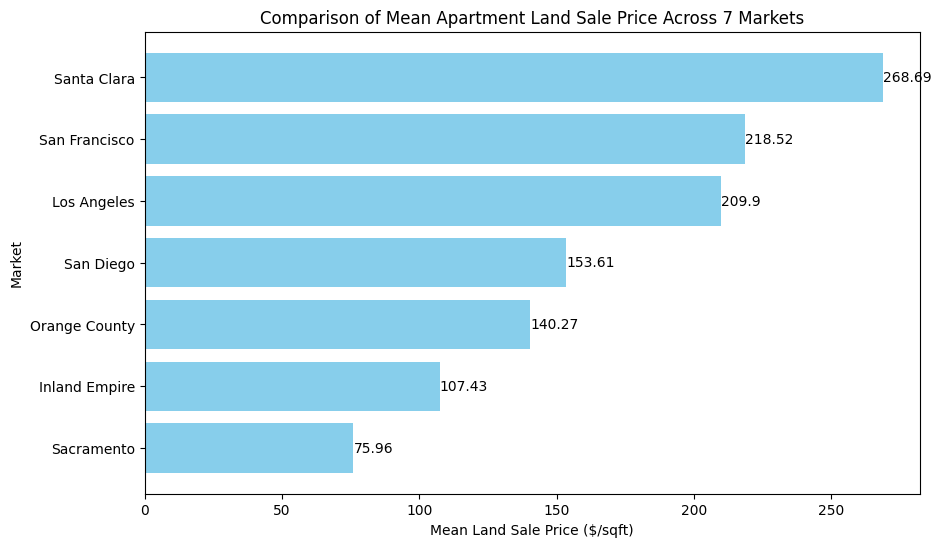

In [67]:
plt.figure(figsize=(10, 6))
bars = plt.barh(mean_land_prices["Market Name"], mean_land_prices["Land Sale to sqft"], color='skyblue')

for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 0.1, bar.get_y() + bar.get_height() / 2, round(xval, 2), ha='left', va='center')

plt.ylabel('Market')
plt.xlabel('Mean Land Sale Price ($/sqft)')
plt.title('Comparison of Mean Apartment Land Sale Price Across 7 Markets')

plt.gca().invert_yaxis()
plt.show()

In [68]:
mean_land_prices = df1.groupby("Market Name")["Land Sale to sqft"].mean().sort_values(ascending=False).reset_index()
mean_revpau = df1.groupby("Market Name")["RevPAU"].mean().reset_index()

In [69]:
mean_values = pd.merge(mean_land_prices, mean_revpau, on="Market Name")

In [70]:
markets = mean_values["Market Name"]
land_cost = mean_values["Land Sale to sqft"]
revpau = mean_values["RevPAU"]

In [71]:
colors = {
    "Inland Empire": "blue",
    "San Diego": "green",
    "Santa Clara": "red",
    "San Francisco": "purple",
    "Orange County": "orange",
    "Sacramento": "cyan",
    "Los Angeles": "magenta"
}
scatter_colors = [colors[market] for market in markets]

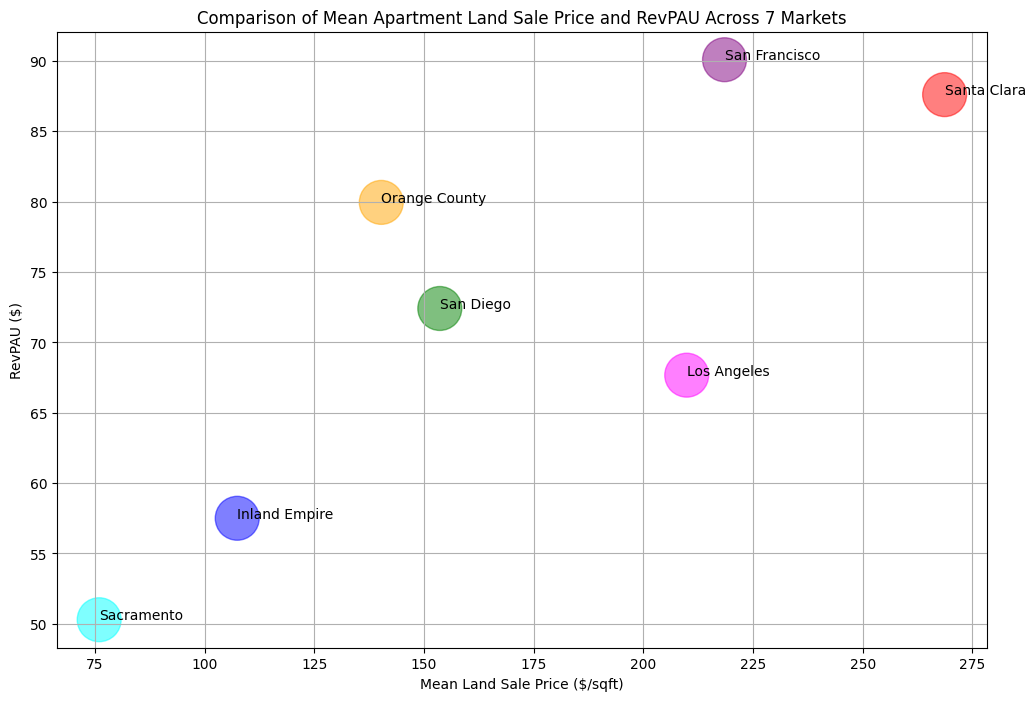

In [73]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(land_cost, revpau, alpha=0.5, c=scatter_colors, s=1000)

plt.xlabel('Mean Land Sale Price ($/sqft)')
plt.ylabel('RevPAU ($)')
plt.title('Comparison of Mean Apartment Land Sale Price and RevPAU Across 7 Markets')
plt.grid(True)

for i, market in enumerate(markets):
    plt.annotate(market, (land_cost[i], revpau[i]))

plt.show()